In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [3]:
housing = pd.read_csv('test_V2.csv')

In [4]:
housing.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
dtypes: float64(5), int64(19), object(4)
memory usage: 413.2+ MB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

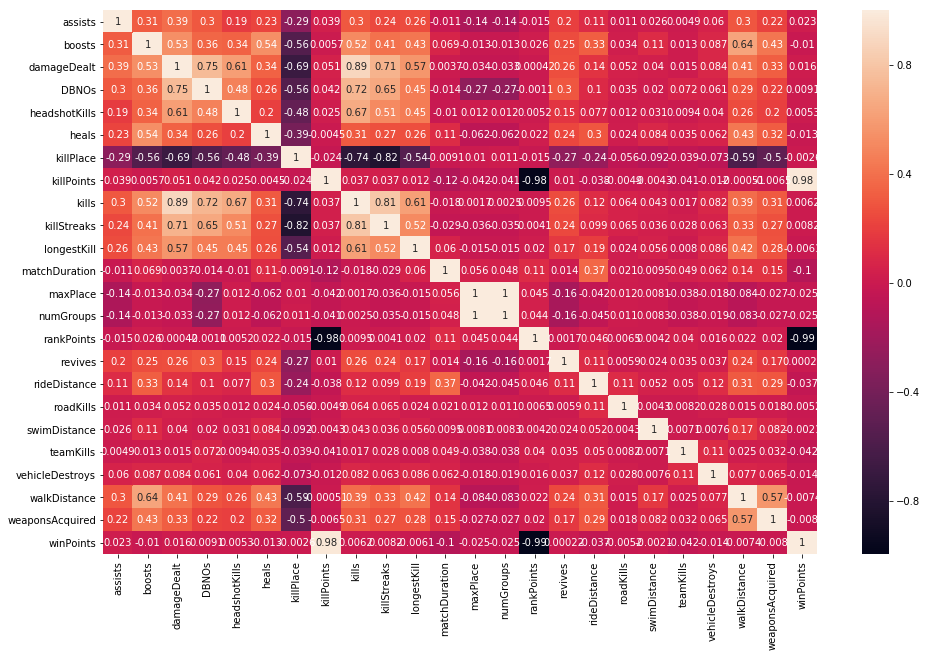

In [7]:
plt.figure(figsize = (16,10))    
sns.heatmap(housing.corr(),annot = True)

In [ ]:
train = pd.read_csv('train_V2.csv', header=0, sep=',', quotechar='"')
train.dropna(inplace=True)
print(len(train))
pd.options.display.max_columns = 2000
train.head()

In [1]:
test = pd.read_csv('test_V2.csv', header=0, sep=',', quotechar='"')
test.dropna(inplace=True)
print(len(test))
test.head()

NameError: name 'pd' is not defined

In [ ]:
train.describe()

In [ ]:
def plot_hist(x, title, noOfBins=50, col="#25203e"):
    
    fig, ax = plt.subplots(figsize=(8,8))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)

    sns.distplot(x, bins=noOfBins, kde=False, color=col)
    plt.xlabel('WinPlacePercentile',fontsize = 15,color='black')
    plt.ylabel('Frequency',fontsize = 15,color='black')
    plt.title(title,fontsize = 20,color='black')
    plt.savefig(title+'.png',format='png',dpi=800)    
    

In [ ]:
def plot_hist1(x, title, noOfBins=50, col="#25203e"):
    
    fig, ax = plt.subplots(figsize=(10,8))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)
    plt.xlim(0.3,0.65)

    sns.distplot(x, bins=noOfBins, kde=False, ax=ax, color=col)
    plt.xlabel('Average Win Place Percentile of a Match',fontsize = 15,color='black')
    plt.ylabel('Frequency',fontsize = 15,color='black')
    plt.title('Histogram of Average Win Place Percentile of a Match',fontsize = 20,color='black')
    plt.savefig(title+'.png',format='png',dpi=800)    
   

In [ ]:
print('The average winning percentile is {:.3f}, the median is {:.3f}'.format(train.winPlacePerc.mean(), train.winPlacePerc.median()))

In [ ]:
plot_hist(train.winPlacePerc, title='Histogram of winning percentiles', col = '#222222')

In [ ]:
train = train.assign(match_mean=train.groupby('matchId').winPlacePerc.transform('mean'))
train = train.assign(match_median = train.groupby('matchId').winPlacePerc.transform('median'))

In [ ]:
plot_hist1(train.match_mean, title='Histogram of average match winning percentiles', col='#AA3939')
plot_hist(train.match_median, title='Histogram of median match winning percentiles');

In [ ]:
train.drop(['match_mean','match_median'], axis=1)
train.columns

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.iloc[:,:-2].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu", vmin=-1, vmax =1)
plt.savefig('Corelation_all.png',format='png', dpi = 1500)
plt.show()

In [ ]:
train.groupby('matchId').mean()

In [ ]:
train['groupId'].value_counts()
len(train['groupId'].value_counts())

len(train['Id'].value_counts())

In [ ]:
y = train['winPlacePerc']
X = train.drop(['winPlacePerc','Id','matchId','groupId'],axis=1)


In [ ]:
pca = PCA()
X['matchType'],_ = pd.factorize(X['matchType'])


In [ ]:
pca.fit(X)

In [ ]:
print(pca.explained_variance_ratio_)  

In [ ]:
print(pca.singular_values_)  

In [ ]:
X_new = pca.fit_transform(X)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, X.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()


myplot(X_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()
plt.savefig('PCA BiPlot.jpg', dpi = 1000)

In [ ]:
def set_categorical(data):


  data.matchId = data.matchId.astype('category')
  data.matchId = data.matchId.cat.codes

  data.groupId = data.groupId.astype('category')
  data.groupId = data.groupId.cat.codes

set_categorical(train)
set_categorical(test)

In [ ]:
def group_features(data):
  
  data['totalPlayers'] = data.groupby('matchId')['matchId'].transform('count')+1
  
  data['teamSize'] = data.groupby('groupId')['groupId'].transform('count')

   colsToNormalize = ['kills','damageDealt']

  for x in colsToNormalize:
    data[str(x+'Norm')] = data[x]/data['totalPlayers']*100
    
    
group_features(train)
group_features(test)

In [ ]:
def add_matchType(data):
  
  solo = ['solo','solo-fpp','normal-solo-fpp','normal-solo']
  duo = ['duo','duo-fpp','normal-duo-fpp','normal-duo']
  squad = ['squad','squad-fpp','normal-squad-fpp','normal-squad']
  other = ['crashfpp','flaretpp','crashtpp','flarefpp']

  data['normMatchType'] = 'none'
  data.loc[data.eval("teamSize==1 & matchType in @solo & normMatchType=='none'"),'normMatchType'] = 'solo'
  data.loc[data.eval("teamSize<=2 & matchType in @duo & normMatchType=='none'"),'normMatchType'] = 'duo'
  data.loc[data.eval("teamSize<=4 & matchType in @squad & normMatchType=='none'"),'normMatchType'] = 'squad'
  data.loc[data.eval("teamSize>0 & normMatchType=='none'"),'normMatchType'] = 'other'
  
  
add_matchType(train)
add_matchType(test)

In [ ]:
sns.countplot('normMatchType', data=train)

In [ ]:
def feature_engineering(data):
  
  data['totalDistance'] = data.rideDistance+data.walkDistance+data.swimDistance
  data.totalDistance.fillna(0,inplace=True)
  data.totalDistance.replace(np.inf, 0, inplace=True)

  data['maxPossibleKills'] = data.totalPlayers-data.teamSize
  data.maxPossibleKills.fillna(0,inplace=True)
  data.maxPossibleKills.replace(np.inf, 0, inplace=True)

  
  data['itemsUsed'] = data.boosts + data.heals + data.weaponsAcquired
  data.itemsUsed.fillna(0,inplace=True)
  data.itemsUsed.replace(np.inf, 0, inplace=True)

  
  data['itemsPerDistance'] = data.itemsUsed/data.totalDistance
  data.itemsPerDistance.fillna(0,inplace=True)
  data.itemsPerDistance.replace(np.inf, 0, inplace=True)

  
  data['killsPerDistance'] = data.kills/data.totalDistance
  data.killsPerDistance.fillna(0,inplace=True)
  data.killsPerDistance.replace(np.inf, 0, inplace=True)

  
  data['damageDealtPerDistance'] = data.damageDealt / data.totalDistance
  data.damageDealtPerDistance.fillna(0,inplace=True)
  data.damageDealtPerDistance.replace(np.inf, 0, inplace=True)

  
  data['maxTeamKills'] = data.groupby('groupId')['kills'].max()
  data.maxTeamKills.fillna(0,inplace=True)
  data.maxTeamKills.replace(np.inf, 0, inplace=True)

 
  data['totalTeamKills'] = data.groupby('groupId')['kills'].sum()
  data.totalTeamKills.fillna(0,inplace=True)
  data.totalTeamKills.replace(np.inf, 0, inplace=True)

  
  data['headshotKillRate'] = data.headshotKills/data.kills
  data.headshotKillRate.fillna(0,inplace=True)
  data.headshotKillRate.replace(np.inf, 0, inplace=True)

  
  data['itemsUsedPerTeam'] = data.groupby('groupId')['itemsUsed'].sum()
  data.itemsUsedPerTeam.fillna(0,inplace=True)
  data.itemsUsedPerTeam.replace(np.inf, 0, inplace=True)

  
  data['percKill'] = data.kills / data.maxPossibleKills
  data.percKill.fillna(0,inplace=True)
  data.percKill.replace(np.inf, 0, inplace=True)

  data['percTeamKills'] = data.totalTeamKills / data.maxPossibleKills
  data.percTeamKills.fillna(0,inplace=True)
  data.percTeamKills.replace(np.inf, 0, inplace=True)

  data['meanTeamKillPlace'] = data.groupby('groupId')['killPlace'].mean()
  data.meanTeamKillPlace.fillna(0,inplace=True)
  data.meanTeamKillPlace.replace(np.inf, 0, inplace=True)
  
  data.matchType = data.matchType.astype('category')
  data.matchType = data.matchType.cat.codes
  
  
feature_engineering(train)
feature_engineering(test)


In [ ]:
train.head()

In [ ]:
flag = True

In [ ]:
if flag==True:
  f,ax = plt.subplots(figsize=(15, 15))
  sns.heatmap(train.iloc[:,:29].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu", vmin=-1, vmax =1)
  plt.show()

In [ ]:
def plot_hist3(x, title,binss=50):
    
    fig, ax = plt.subplots(figsize=(13,7))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)

    ax.set_title(title)
    sns.distplot(x, bins=binss, kde=False, ax=ax);

In [ ]:
if flag==True:
  plot_hist3(train.teamSize, title='Histogram of team sizes',binss=73)
  
  plt.xlim(0,12)
  plt.xticks(range(12))

In [ ]:
train.normMatchType = train.normMatchType.astype('category')
train.normMatchType = train.normMatchType.cat.codes

test.normMatchType = test.normMatchType.astype('category')
test.normMatchType = test.normMatchType.cat.codes


In [ ]:
if flag==True:
  f,ax = plt.subplots(figsize=(8,8))
  sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
  plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='black')
  plt.ylabel('Win Percentile',fontsize = 15,color='black')
  plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='black')
  plt.grid()
  plt.savefig("vehicle.png",dpi=1000)
  plt.show()

In [ ]:
if flag==True:
  f,ax = plt.subplots(figsize=(10,8))
  sns.pointplot(x='kills',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
  plt.xlim(0,30)
  plt.xlabel('Number of Kills',fontsize = 15,color='black')
  plt.ylabel('Win Percentile',fontsize = 15,color='black')
  plt.title('Kills/ Win Ratio',fontsize = 20,color='black')
  plt.grid()
  plt.savefig("kills.png",dpi=1000)
  plt.show()

In [ ]:
if flag==True:
  f,ax = plt.subplots(figsize=(8,8))
  sns.pointplot(x='totalDistance',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
  plt.xlabel('Total Distance',fontsize = 15,color='black')
  plt.ylabel('Win Percentage',fontsize = 15,color='black')
  plt.title('Total Distance/ Win Ratio',fontsize = 20,color='black')
  plt.grid()
  plt.savefig("dist.png",dpi=600)
  plt.show()

In [ ]:
if flag==True:
  f,ax = plt.subplots(figsize=(8,8))
  highPlayer = train[train['totalPlayers']>49]
  plt.figure(figsize=(15,10))
  sns.countplot(highPlayer['totalPlayers'])
  plt.title("Players totalPlayers",fontsize=15)
  plt.savefig("totalplayers.png",dpi=600)
  plt.show()

In [ ]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
y = train['winPlacePerc']
X = train.drop(['winPlacePerc','matchId','groupId','Id'],axis=1)

X_test = test.drop(['matchId','groupId','Id'],axis=1)

X.shape[1]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7)

len(X_train)

del train,test,X,y

gc.collect()


In [ ]:
def calculate_error(cl,name):
  print(name)
  print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_val, cl.predict(X_val))))
  print('R2 score is {:.2%}'.format(r2_score(y_val, cl.predict(X_val))))

In [ ]:
gridParams = {
    'learning_rate': [0.05,0.1,0.3,0.002],
    'n_estimators': [50,250],
    'num_leaves': [6,10,16,200],
    'boosting_type' : ['gbdt','dart','goss','rf'],
    'objective' : ['mae'],
    }



mdl = LGBMRegressor(boosting_type= 'gbdt',
          objective = 'mae',
          n_estimators=250,
          learning_rate=0.3, 
          num_leaves=200, 
          n_jobs = 3, 
          silent = True,
          max_depth = -1, 
          verbose=2,
          random_state=212)


mdl.get_params().keys()

grid = GridSearchCV(mdl, gridParams,
                    verbose=2,
                    n_jobs=2)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

In [ ]:
RANDOM_STATE=212

TARGET = 'winplaceperc'
TRAIN_SIZE = 0.9
EARLY_STOP_ROUNDS = 10
time_0 = datetime.datetime.now()

lgbm = LGBMRegressor(objective='mae', n_estimators=250,  
                     learning_rate=0.3, num_leaves=200, 
                     n_jobs=-1,  random_state=RANDOM_STATE, verbose=1)

lgbm.fit(X_train, y_train,
         eval_set=[(X_val, y_val)], 
         eval_metric='mae', early_stopping_rounds=EARLY_STOP_ROUNDS, 
         verbose=1)

time_1  = datetime.datetime.now()

print('Training took {} seconds. Best iteration is {}'.format((time_1 - time_0).seconds, lgbm.best_iteration_))

In [ ]:
calculate_error(lgbm,"LGBM")

In [ ]:
y_predict = lgbm.predict(X_test)

In [ ]:
y_predict

In [ ]:
sub = pd.read_csv('sample_submission_V2.csv', header=0, sep=',', quotechar='"')
sub.drop(['winPlacePerc'],axis=1 )
sub['winPlacePerc'] = y_predict
sub.head()

In [ ]:
sub.to_csv("sample_submission.csv")

In [ ]:
def plot_training(lgbm):
    
    fig, ax = plt.subplots(figsize=(13,7))
    plt.rcParams.update({"font.size":"20"})
    losses = lgbm.evals_result_['valid_0']['l1']
    ax.set_ylim(np.max(losses), 0)
    ax.set_xlim(0,100)
    plt.rc('xtick', labelsize=20)    
    
    plt.rc('ytick', labelsize=20)
    
    ax.set_xlabel('n_estimators',fontsize=25)
    ax.set_ylabel('Mean Asbolute Error',fontsize=25)
    ax.set_title('Evolution of MAE over training iterations',fontsize=30)
    ax.plot(losses, color='grey');
    plt.savefig("lgbmmae.png",dpi=500)
    
plot_training(lgbm)